In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss
import datetime
import matplotlib.pyplot as plt

# Exam 1 - Coding Portion

In this section, please answer the following questions and show your work in the notebook. For each response, please check carefully what it asks, and give a response matching that. Also, please clean it up a bit so things are readable, I should be able to find what you found and follow. 

Grading breakdown:
<ul>
<li> Can I read and follow this code? 5 points. </li>
<li> Q1 - Generalize to population - 5 points. </li>
<li> Q2 - Correlation - 3 points. </li>
<li> Q3 - Multiple Groups - 5 points. </li>
<li> Q4 - Store Problem - 7 points. </li>
</ul>

Other than what's specifically instructed, you can use/import pretty much anything and take any approach you want. Just be sure to explain what you're doing and why, and make it clear what your final answers are.

## Submission

To submit, just commit and push your changes to your GitHub repository, as normal. There's no auotmated testing or anything, if yours is visible online on the repository page, you're good. 

## Data Preparation - Don't Edit This Section

In [39]:
data_uae = pd.read_csv("data/uae_real_estate_2024.csv")
data_uae = data_uae[data_uae['price'] <= 5000000]
data_uae['verified'] = data_uae['verified'].astype(bool)


data_uae["sq_ft"] = data_uae["sizeMin"].apply(lambda x: int(x.split(" ")[0].replace(",", "")) if pd.notnull(x) else np.nan)
data_uae["description_length"] = data_uae["description"].apply(lambda x: len(x) if pd.notnull(x) else 0)
data_uae["log_price"] = np.log(data_uae["price"])
data_uae.head()


data_uae.head()

,title,displayAddress,bathrooms,bedrooms,addedOn,type,price,verified,priceDuration,sizeMin,furnishing,description,sq_ft,description_length,log_price
0,Great ROI I High Floor I Creek View,"Binghatti Canal, Business Bay, Dubai",3,2,2024-08-14T12:02:53Z,Residential for Sale,2500000,True,sell,1323 sqft,NO,MNA Properties is delighted to offer this apar...,1323,1272,14.731801
2,Green Belt | Corner Unit | Spacious Plot,"La Rosa 6, Villanova, Dubai Land, Dubai",3,4,2024-08-14T06:24:28Z,Residential for Sale,3600000,True,sell,2324 sqft,NO,Treo Homes is very pleased to be bringing to t...,2324,1102,15.096444
3,2BR+Study | Near Pool and Park | Private,"Springs 15, The Springs, Dubai",3,2,2024-08-15T06:07:22Z,Residential for Sale,2999999,True,sell,1647 sqft,NO,2 Bedrooms + Study | Near Pool &amp; Park | Pr...,1647,1025,14.914123
4,Vacant | Well Maintained | Area Expert,"Noor Townhouses, Town Square, Dubai",3,3,2024-08-09T08:28:59Z,Residential for Sale,2449999,True,sell,2105 sqft,NO,-Type 1\n-3 Bed+Maid\n-Close To Amenities\n-BU...,2105,1026,14.711598
6,High Floor | Motivated Seller | Full Marina View,"Vida Residences Dubai Marina, Dubai Marina, Dubai",3,2,2024-08-16T05:03:07Z,Residential for Sale,4980000,True,sell,1095 sqft,NO,Property Features:\n* 2 Bedrooms\n* Unfurnishe...,1095,1286,15.420940


In [40]:
data_uae.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3961 entries, 0 to 5057
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               3961 non-null   object 
 1   displayAddress      3961 non-null   object 
 2   bathrooms           3882 non-null   object 
 3   bedrooms            3881 non-null   object 
 4   addedOn             3961 non-null   object 
 5   type                3961 non-null   object 
 6   price               3961 non-null   int64  
 7   verified            3961 non-null   bool   
 8   priceDuration       3961 non-null   object 
 9   sizeMin             3961 non-null   object 
 10  furnishing          3959 non-null   object 
 11  description         3961 non-null   object 
 12  sq_ft               3961 non-null   int64  
 13  description_length  3961 non-null   int64  
 14  log_price           3961 non-null   float64
dtypes: bool(1), float64(1), int64(3), object(10)
memory usage: 4

## Price of Population

Our data has a sample of real estate listings in the UAE. Use this sample to estimate the mean price as well as a 95% confidence interval for the mean price of all real estate listings in the UAE.

<b>If needed, use a value of 875000 for the population count of number of homes in the UAE.</b>

In [41]:
# Generalize - estimate mean price and 95% CI (with finite population correction)
# Use the numeric 'price' column only to avoid non-numeric columns like 'priceDuration'
price_series = data_uae['price'].dropna()

n = len(price_series)
mean_price = price_series.mean()
std_price = price_series.std(ddof=1)

alpha = 0.05
t_critical = ss.t.ppf(1 - alpha/2, df=n-1)
se = std_price / np.sqrt(n)
margin_of_error = t_critical * se

# Finite population correction - use 875000 (per instructions) if appropriate
N = 875000
if N > n:
	fpc = np.sqrt((N - n) / (N - 1))
else:
	fpc = 1.0

adjusted_margin_of_error = margin_of_error * fpc
lower_bound = mean_price - adjusted_margin_of_error
upper_bound = mean_price + adjusted_margin_of_error

print(f"Sample size: {n}")
print(f"Mean price: {mean_price:,.2f}")
print(f"95% CI (without FPC): ({mean_price - margin_of_error:,.2f}, {mean_price + margin_of_error:,.2f})")
print(f"95% CI (with FPC, N={N}): ({lower_bound:,.2f}, {upper_bound:,.2f})")
print(f"Adjusted margin of error: {adjusted_margin_of_error:,.2f}")


Sample size: 3961
Mean price: 2,028,387.53
95% CI (without FPC): (1,990,298.08, 2,066,476.99)
95% CI (with FPC, N=875000): (1,990,384.37, 2,066,390.70)
Adjusted margin of error: 38,003.17


## Show the Correlation Between Bedrooms and Bathrooms

This may require data preparation.

<b> State your answer, anlong with a statement of what it means in reality. (e.g. if I see correlation of .02 between 'shoe size' and 'IQ', I would say that the two appear to be unrelated, and knowing one tells us nothing about the other)</b>

In [42]:
bedrooms_col = [col for col in data_uae.columns if 'bed' in col.lower()][0]
bathrooms_col = [col for col in data_uae.columns if 'bath' in col.lower()][0]

# Take a copy and normalize textual entries to numeric.
# Map common words like "studio" to 0, extract digits from strings like "3+" or "2 bed"
subset = data_uae[[bedrooms_col, bathrooms_col]].copy()

for col in [bedrooms_col, bathrooms_col]:
    # ensure string, lowercase, map 'studio' -> '0'
    subset[col] = subset[col].astype(str).str.lower().replace({'studio': '0'})
    # extract the leading integer if present
    subset[col] = subset[col].str.extract(r'(\d+)', expand=False)
    # convert to numeric, invalid -> NaN
    subset[col] = pd.to_numeric(subset[col], errors='coerce')

# Drop rows that couldn't be converted
subset = subset.dropna()

# --- Compute the correlation ---
correlation = subset[bedrooms_col].corr(subset[bathrooms_col])

print(f"Sample size for correlation: {len(subset)}")
print(f"Correlation between {bedrooms_col} and {bathrooms_col}: {correlation:.2f}")

# --- Interpretation ---
if correlation > 0.7:
    print("This shows a strong positive relationship — properties with more bedrooms tend to have more bathrooms.")
elif correlation > 0.4:
    print("This shows a moderate positive relationship — as bedroom count increases, bathroom count generally increases.")
elif correlation > 0.1:
    print("This shows a weak positive relationship — the two are somewhat related but not strongly.")
elif correlation > -0.1:
    print("This shows virtually no relationship — knowing one tells us little about the other.")
else:
    print("This shows a negative relationship — which would be unusual for bedroom/bathroom data.")


Sample size for correlation: 3878
Correlation between bedrooms and bathrooms: 0.91
This shows a strong positive relationship — properties with more bedrooms tend to have more bathrooms.


Correlation matrix:
                    price  verified  sq_ft  description_length  log_price  \
price                1.00      0.14   0.46                0.01       0.95   
verified             0.14      1.00  -0.22               -0.03       0.16   
sq_ft                0.46     -0.22   1.00               -0.02       0.43   
description_length   0.01     -0.03  -0.02                1.00       0.03   
log_price            0.95      0.16   0.43                0.03       1.00   
Price_per_sqft       0.37      0.34  -0.36                0.01       0.40   

                    Price_per_sqft  
price                         0.37  
verified                      0.34  
sq_ft                        -0.36  
description_length            0.01  
log_price                     0.40  
Price_per_sqft                1.00  


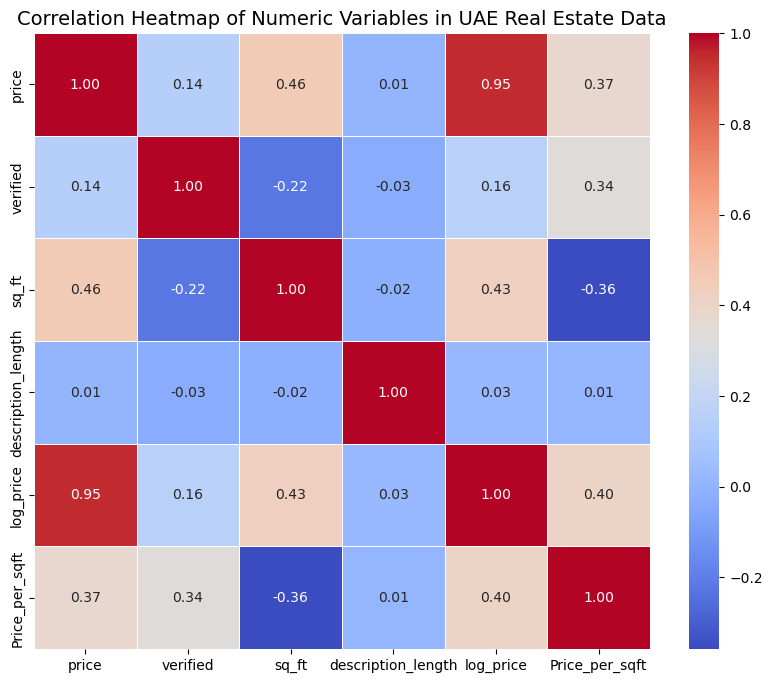

In [51]:
corr_matrix = data_uae.corr(numeric_only=True)

# --- Display correlation matrix ---
print("Correlation matrix:")
print(corr_matrix.round(2))

# --- Plot heatmap ---
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,              # show numeric correlation values
    fmt=".2f",
    cmap="coolwarm",         # color scale: red = strong positive, blue = strong negative
    square=True,
    linewidths=0.5
)
plt.title("Correlation Heatmap of Numeric Variables in UAE Real Estate Data", fontsize=14)
plt.show()

## Multiple Groups

Based on this data, do any of the groups (furnished, unfurnished, or partially furnished) appear to be different in terms of price per square foot? State your answer and show evidence to support your answer.


Average price per square foot by furnishing type:
furnishing
NO        1557.762158
PARTLY    1430.408732
YES       1922.973949
Name: Price_per_sqft, dtype: float64

ANOVA F-statistic: 70.02, p-value: 0.0000
→ There is a statistically significant difference in mean price per square foot between furnishing groups.


C:\Users\uugan\AppData\Local\Temp\ipykernel_5648\1815445238.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x=furnish_col, y="Price_per_sqft", palette="Set2")


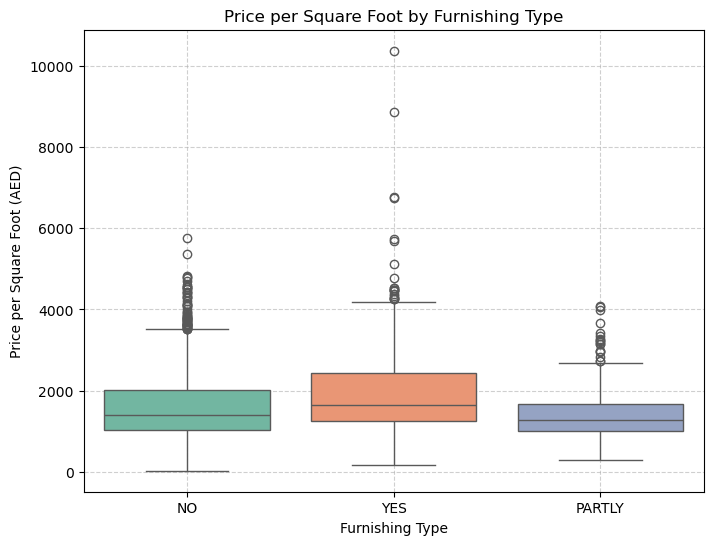

In [43]:
# Go
furnish_col = "furnishing"        # correct column name in data_uae
price_col = "price"               # correct column name in data_uae
area_col = "sq_ft"                # use the already prepared numeric area column

import matplotlib.pyplot as plt
from scipy import stats

# --- Create price per square foot ---
data_uae["Price_per_sqft"] = data_uae[price_col] / data_uae[area_col]

# --- Drop missing or invalid values ---
subset = data_uae[[furnish_col, "Price_per_sqft"]].dropna()

# --- Show summary statistics by group ---
group_means = subset.groupby(furnish_col)["Price_per_sqft"].mean()
print("\nAverage price per square foot by furnishing type:")
print(group_means)

# --- Perform ANOVA test to see if groups differ significantly ---
# Use scipy.stats imported earlier as ss
groups = [group["Price_per_sqft"].values for name, group in subset.groupby(furnish_col)]

if len(groups) >= 2 and all(len(g) > 1 for g in groups):
    f_stat, p_val = ss.f_oneway(*groups)
    print(f"\nANOVA F-statistic: {f_stat:.2f}, p-value: {p_val:.4f}")
    if p_val < 0.05:
        print("→ There is a statistically significant difference in mean price per square foot between furnishing groups.")
    else:
        print("→ There is no statistically significant difference between groups.")
else:
    print("\nNot enough groups or samples to run ANOVA.")

# --- Visualize with boxplot ---
plt.figure(figsize=(8, 6))
sns.boxplot(data=subset, x=furnish_col, y="Price_per_sqft", palette="Set2")
plt.title("Price per Square Foot by Furnishing Type")
plt.xlabel("Furnishing Type")
plt.ylabel("Price per Square Foot (AED)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Store

In this scenario, we are looking to puchase a small retail store, but don't want to do so unless we project to make a profit within the first year.

This store is run by a real nerd, so they gave us some statistical data for us to estimate (the exact values are in the code cell below as variables):
<ul>
<li> The number of customers per day is described by a Poisson distribution with a rate of <b><i>customers_per_day</i></b> customers per day.</li>
<li> The buy rate (the percentage of customers that make a purchase) is <b><i>buy_rate</i></b>.</li>
<li> The amount each customer spends is described by a normal distribution with a mean of <b><i>mean_purchase_per_buyer</i></b> and a standard deviation of <b><i>std_dev_purchase_per_buyer</i></b>.</li>
<li> Each day, we need to take in at least <b><i>minimum_daily_income</i></b> to cover costs - to make it a 'good day'.</li>
<li> In a given year (we open every day), we must have over <b><i>good_day_minimum_count</i></b> good days for the year to be a success.</li>
</ul>

To determine if the store is a good investment, we will simulate the daily sales over the course of a year and see how often we meet or exceed the <b><i>minimum_daily_income</i></b> threshold. <b> Demonstrate how comfortable you are with the statement "we express this store to be a success", and show why in your calculations.</b> This is not something with one specific answer, there are many details that may vary somewhat. If it is hard, I recommend starting with a very simple model - can you simulate one customer? Can we simulate one day of customers? Can we simulate one year of days? <b>Build a simple model and make it more accurate incrementally</b>, doing it all at once can be hard, doing it piece by piece is easier. 

<b>Overall, for grades, this will be roughly logarithmicly evaluated - if you get something ok, you'll get points. The better it is the more points, but as you go up, the curve flattens. The most value is in getting a simple, working version. </b>

<b>tl;dr:</b> We have a store with customers and purchases defined by these distributions. Simulate a year of operations and deterimine the number of dayas in that year the store made over the cutoff - if it did, that's a success, if not, it's a failure. 

Days meeting or exceeding minimum daily income: 358
Good day threshold: 329
Average daily income: 5,564.65 AED
Store success: ✅ SUCCESS


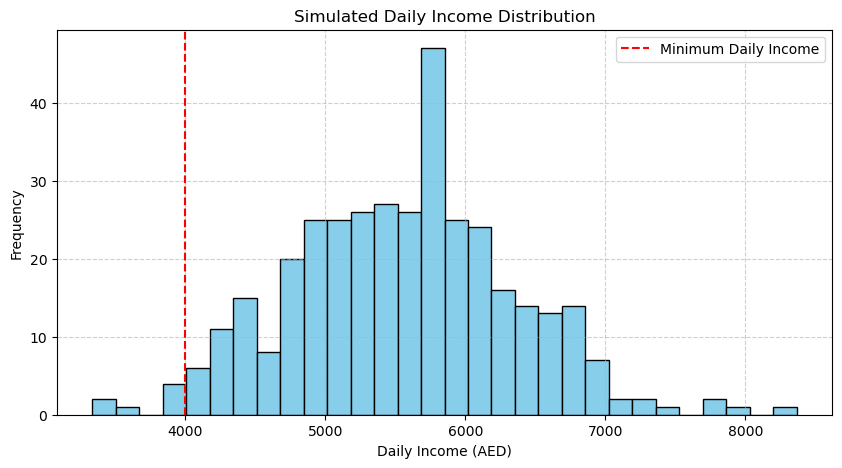

In [52]:
customers_per_day = 200
buy_rate = 0.22
mean_purchase_per_buyer = 125
stddev_purchase_per_buyer = 30
minimum_daily_income = 4000

good_day_minimum_rate = .10
good_day_minimum_count = 365 - (int(365 * good_day_minimum_rate))

# Get simulating!
# --- Simulation parameters ---
num_days = 365
np.random.seed(42)  # for reproducibility

# --- Simulate each day ---
daily_income = []
for day in range(num_days):
    # Step 1: simulate number of customers that day (Poisson)
    num_customers = np.random.poisson(customers_per_day)
    
    # Step 2: how many actually buy something (Binomial)
    num_buyers = np.random.binomial(num_customers, buy_rate)
    
    # Step 3: simulate purchase amounts for each buyer (Normal)
    purchases = np.random.normal(mean_purchase_per_buyer, stddev_purchase_per_buyer, num_buyers)
    
    # Step 4: sum up total revenue for the day
    total_income = purchases.sum()
    daily_income.append(total_income)

# --- Evaluate store performance ---
daily_income = np.array(daily_income)
good_days = np.sum(daily_income >= minimum_daily_income)

print(f"Days meeting or exceeding minimum daily income: {good_days}")
print(f"Good day threshold: {good_day_minimum_count}")
print(f"Average daily income: {daily_income.mean():,.2f} AED")
print(f"Store success: {'✅ SUCCESS' if good_days >= good_day_minimum_count else '❌ FAILURE'}")

plt.figure(figsize=(10,5))
plt.hist(daily_income, bins=30, color='skyblue', edgecolor='black')
plt.axvline(minimum_daily_income, color='red', linestyle='--', label='Minimum Daily Income')
plt.title("Simulated Daily Income Distribution")
plt.xlabel("Daily Income (AED)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
